In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy as gp
from geopy import distance
import math
import matplotlib as mpl
import seaborn as sns

In [2]:
def do_star_graph_series(series,node_color='pink',font_color='black',mode='node',title='',save_under=''):
    labs = ['']+list(series.index)
    labs = dict(zip(labs,labs))
    g = nx.DiGraph()
    i = 1
    g.add_star(['']+list(series.index))

    pos = nx.layout.spring_layout(g)
    if 0 in series:
        print("Do not enter 0 in the series.")
    if mode=='both':
        
        node_sizes = [100]+list(series.values.ravel())
        edge_colors =list(map(math.log,series.values.ravel()))    
        nodes = nx.draw_networkx_nodes(g,pos,node_size=node_sizes,node_color=node_color)
        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2,edge_cmap = plt.cm.winter,edge_color=edge_colors)
        pc = mpl.collections.PatchCollection(edges,cmap=plt.cm.winter)
        pc.set_array(edge_colors)
        plt.colorbar(pc)

    # edge_colors=range(2,g.number_of_edges()+2 )
    elif mode=='edge':
        edge_colors =list(map(math.log,series.values.ravel()))
        nodes = nx.draw_networkx_nodes(g,pos,node_color=node_color)
        node_sizes = [100]+list(series.values.ravel())

        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2,edge_cmap = plt.cm.winter,edge_color=edge_colors)
        pc = mpl.collections.PatchCollection(edges,cmap=plt.cm.winter)
        pc.set_array(edge_colors)
        plt.colorbar(pc)
    elif mode=='node':
        node_sizes = [100]+list(series.values.ravel())
        nodes = nx.draw_networkx_nodes(g,pos,node_size=node_sizes,node_color=node_color)
        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2)

    labels = nx.draw_networkx_labels(g,pos,labels=labs,font_color=font_color)



    ax = plt.gca()
    ax.set_axis_off()
    fig = plt.gcf()
    fig.set_size_inches(14,10)
    
    plt.title(title)
    if len(save_under) > 0 :
        plt.savefig(save_under)
    plt.show()

In [5]:
data = pd.read_csv('../data/openfoodfacts.csv',delimiter='\t',low_memory = False)
distance_df = pd.read_csv('../data/DistancePerProduct.csv')
dico = pd.read_csv("../data/Destination-Coordinate-MAN.csv")


In [6]:
dico = dico[["destination","country"]]

dico_d = dict(zip(dico["destination"],dico["country"]))

In [7]:
# data['code'] = data['code'].apply(lambda x : x.strip('0'))
# data.set_index('code',inplace=True)
distance_df.set_index('Unnamed: 0',inplace=True)
distance_df.index.name = ''



In [8]:
z = data.join(distance_df).dropna(subset=['distance'])

In [9]:
z.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,distance
106,0000000020114,http://world-en.openfoodfacts.org/product/0000...,chris13,1502444009,2017-08-11T09:33:29Z,1524490564,2018-04-23T13:36:04Z,Naturablue original,NaN,250 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,0000000274722,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1514659309,2017-12-30T18:41:49Z,1535310176,2018-08-26T19:02:56Z,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
254,0000000290616,http://world-en.openfoodfacts.org/product/0000...,b7,1484605978,2017-01-16T22:32:58Z,1484606542,2017-01-16T22:42:22Z,Salade Cesar,Laitue en salade,0.980 kg,...,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
264,0000000394710,http://world-en.openfoodfacts.org/product/0000...,b7,1484497370,2017-01-15T16:22:50Z,1484501040,2017-01-15T17:24:00Z,Danoises à la cannelle roulées,Pâtisserie,1.150 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
269,0000001071894,http://world-en.openfoodfacts.org/product/0000...,bcatelin,1409411252,2014-08-30T15:07:32Z,1461437669,2016-04-23T18:54:29Z,Flute,Flute,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,971.5166387817493 km


In [10]:
## Explode the categroies...
explode = z['categories_en'].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
explode = explode.reset_index().set_index('level_1')
explode = explode.drop(['level_0'],axis=1)
explode.index.name=''
explode.head()

,0
,
106,Dietary supplements
251,Meals
254,Plant-based foods and beverages
264,Sugary snacks
269,Plant-based foods and beverages


In [11]:
merged = explode.join(z)
merged

,0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,distance
106,Dietary supplements,0000000020114,http://world-en.openfoodfacts.org/product/0000...,chris13,1502444009,2017-08-11T09:33:29Z,1524490564,2018-04-23T13:36:04Z,Naturablue original,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,Meals,0000000274722,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1514659309,2017-12-30T18:41:49Z,1535310176,2018-08-26T19:02:56Z,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,Meat-based products,0000000274722,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1514659309,2017-12-30T18:41:49Z,1535310176,2018-08-26T19:02:56Z,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,Meals with meat,0000000274722,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1514659309,2017-12-30T18:41:49Z,1535310176,2018-08-26T19:02:56Z,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,Poultry meals,0000000274722,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1514659309,2017-12-30T18:41:49Z,1535310176,2018-08-26T19:02:56Z,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,Microwave meals,0000000274722,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1514659309,2017-12-30T18:41:49Z,1535310176,2018-08-26T19:02:56Z,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,Turkey dishes,0000000274722,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1514659309,2017-12-30T18:41:49Z,1535310176,2018-08-26T19:02:56Z,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
254,Plant-based foods and beverages,0000000290616,http://world-en.openfoodfacts.org/product/0000...,b7,1484605978,2017-01-16T22:32:58Z,1484606542,2017-01-16T22:42:22Z,Salade Cesar,Laitue en salade,...,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
254,Plant-based foods,0000000290616,http://world-en.openfoodfacts.org/product/0000...,b7,1484605978,2017-01-16T22:32:58Z,1484606542,2017-01-16T22:42:22Z,Salade Cesar,Laitue en salade,...,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
254,Fruits and vegetables based foods,0000000290616,http://world-en.openfoodfacts.org/product/0000...,b7,1484605978,2017-01-16T22:32:58Z,1484606542,2017-01-16T22:42:22Z,Salade Cesar,Laitue en salade,...,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km


In [12]:
largest = explode[explode[0].apply(lambda x : not x.startswith('en:'))][0].value_counts().nlargest(10)

Plant-based foods and beverages


C:\Users\johan\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


-------------


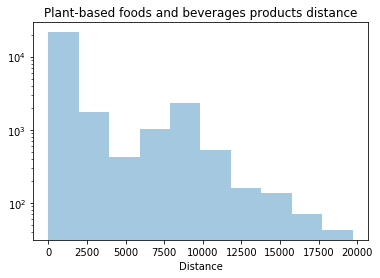

Plant-based foods
-------------


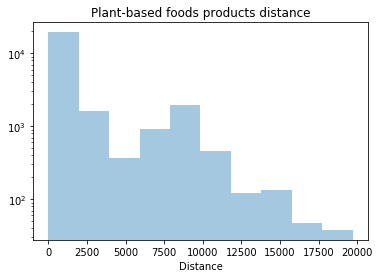

Sugary snacks
-------------


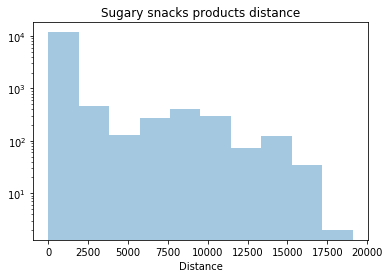

Beverages
-------------


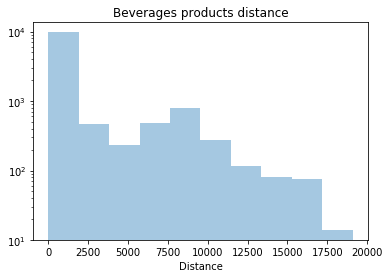

Dairies
-------------


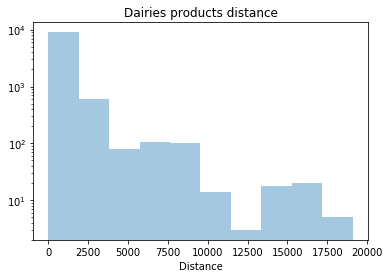

Meals
-------------


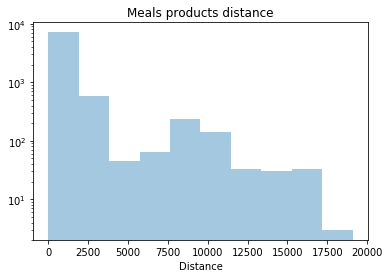

Fruits and vegetables based foods
-------------


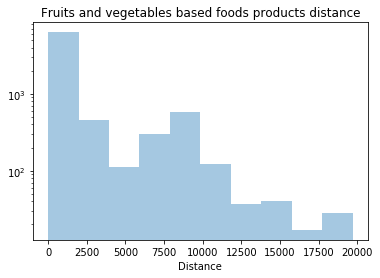

Cereals and potatoes
-------------


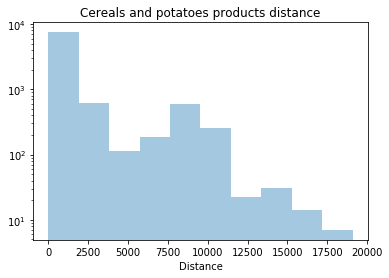

Meats
-------------


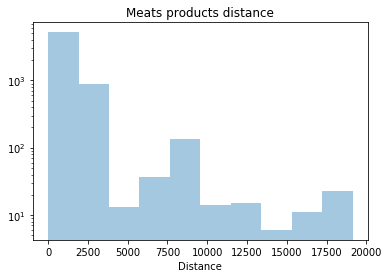

Fermented foods
-------------


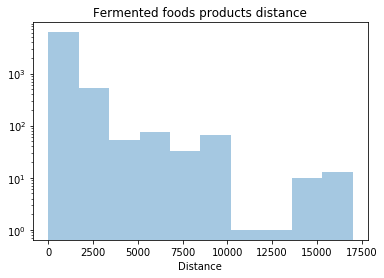

In [48]:
for category in list(largest.index):
    cat = merged[merged[0]==category]
    print(category)
    cat['distance'] = cat['distance'].apply(lambda x : float(x[:-2]))
#     cat['distance'].plot.hist(bins=10,title=category+" distance",logy=True,grid=True)
    
    g = sns.distplot(cat['distance'],bins=10, kde=False, rug=False);
#     plt.savefig('../img/top_15_cat_france_sns.svg',bbox_inches='tight')
    g.axes.set_yscale('log')
    plt.xlabel("Distance")
    plt.title(category+" products distance")
    plt.savefig("../img/"+category+"_distance_sns.svg")
    print("-------------")
    plt.show()

C:\Users\johan\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Plant-based foods and beverages


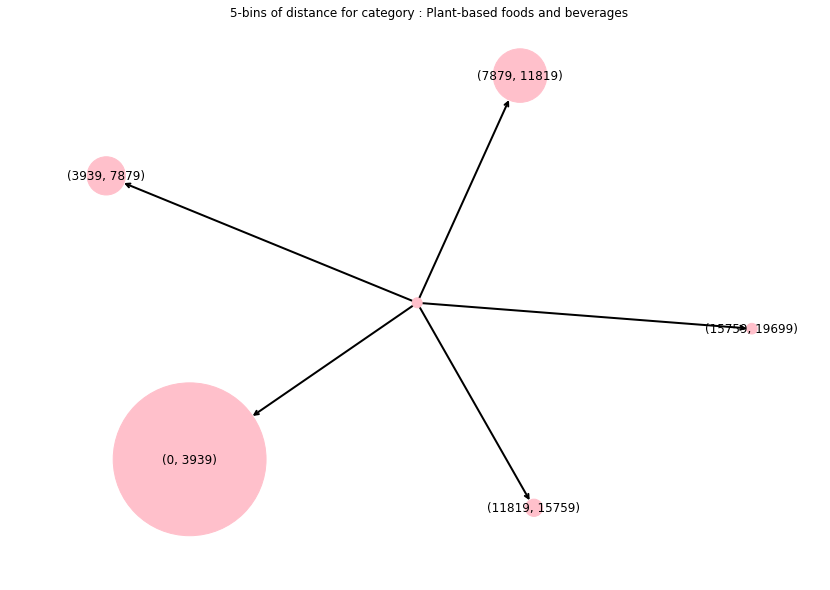

Plant-based foods


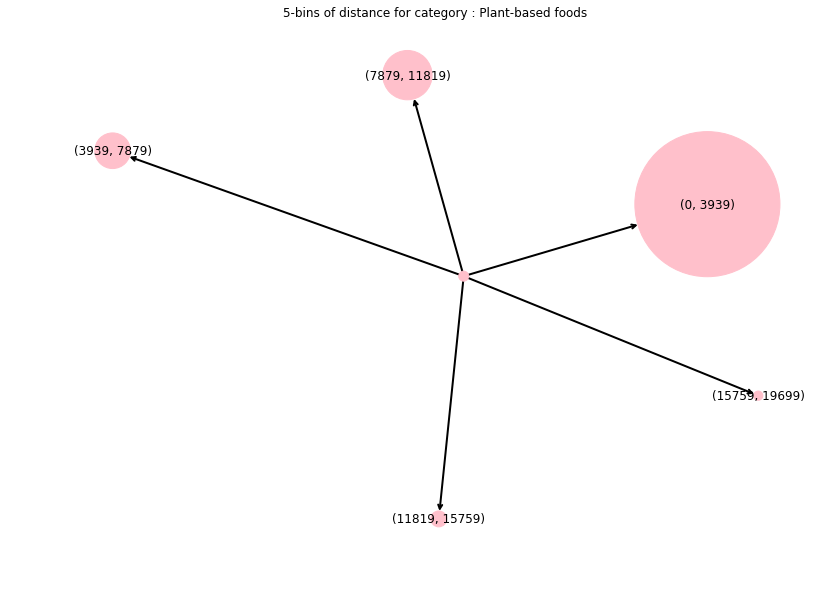

Sugary snacks


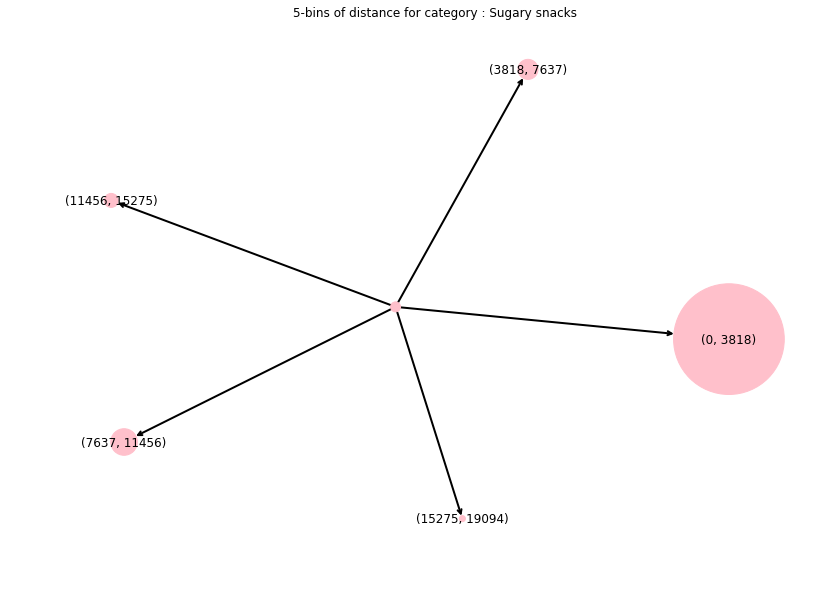

Beverages


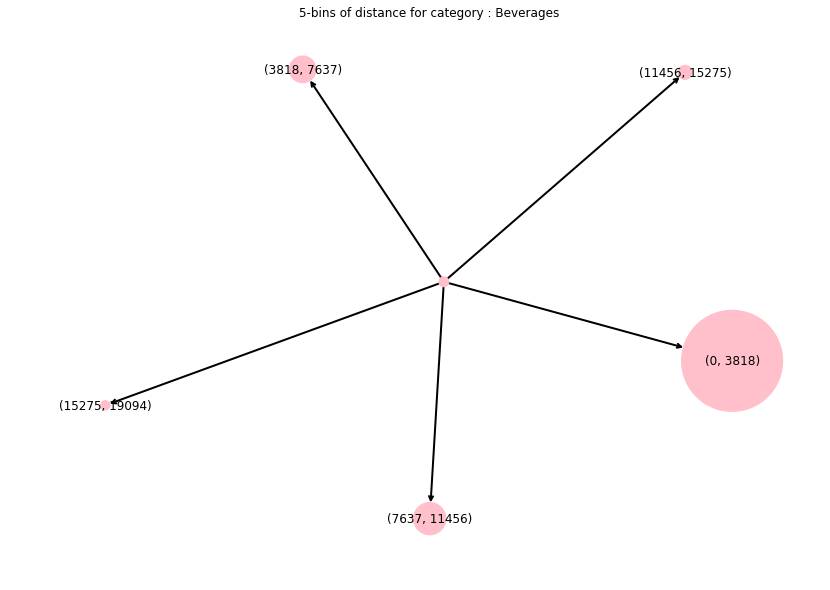

Dairies


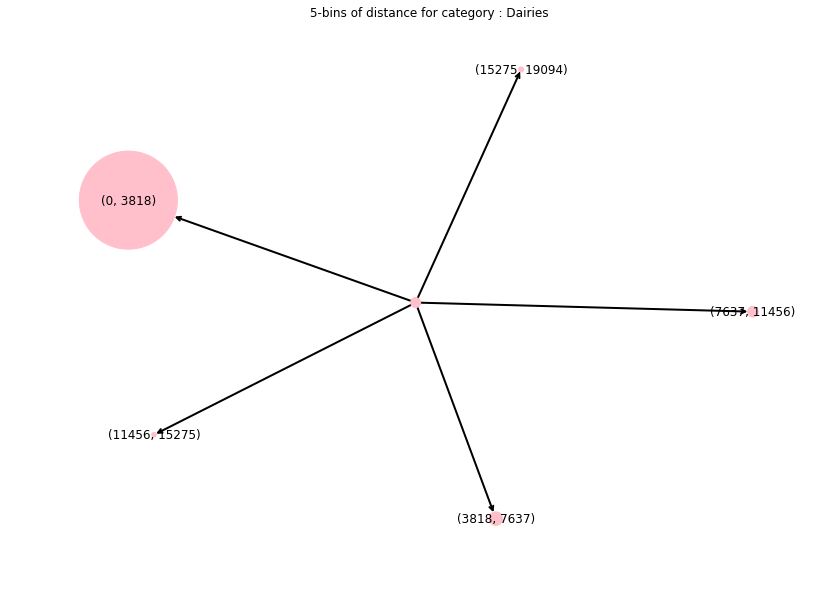

Meals


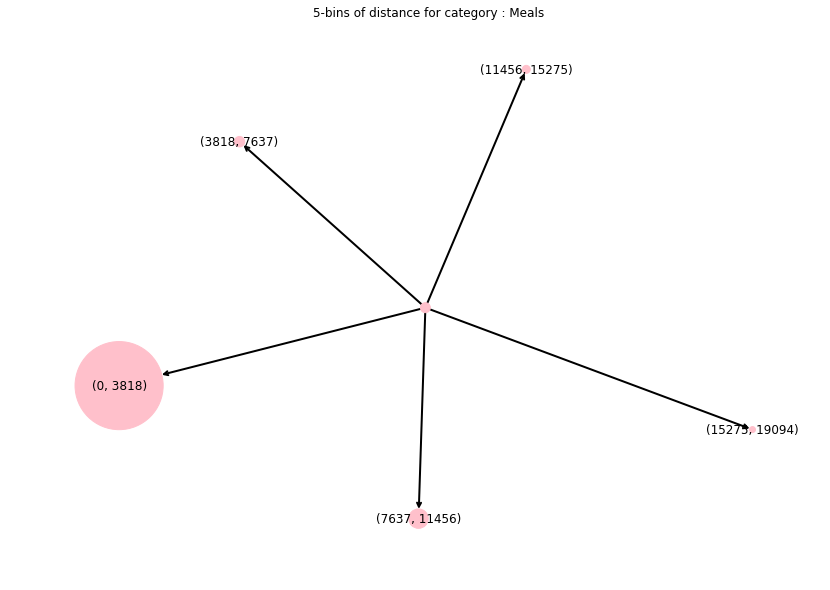

Fruits and vegetables based foods


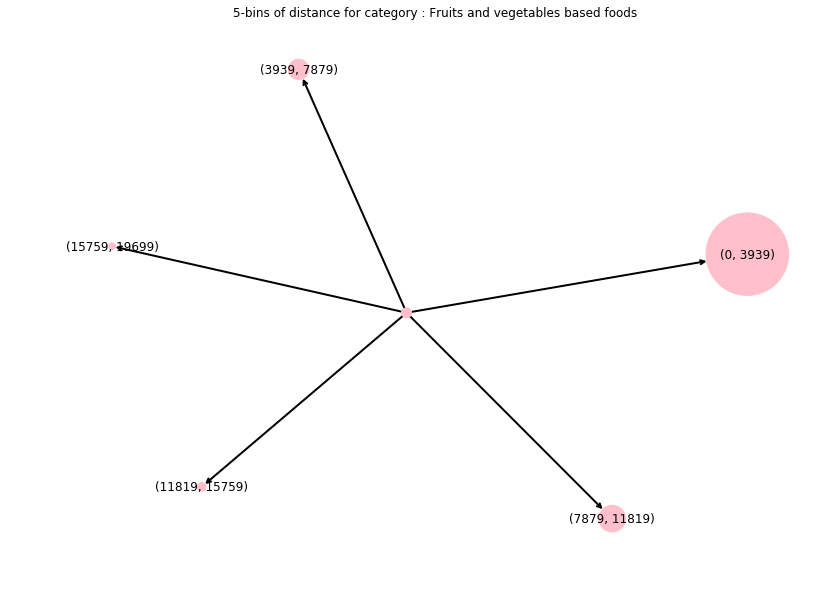

Cereals and potatoes


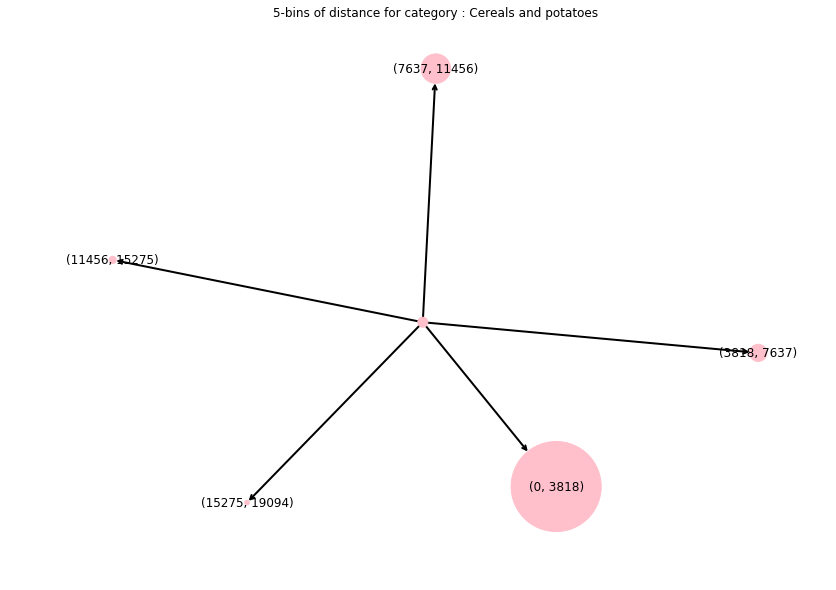

Meats


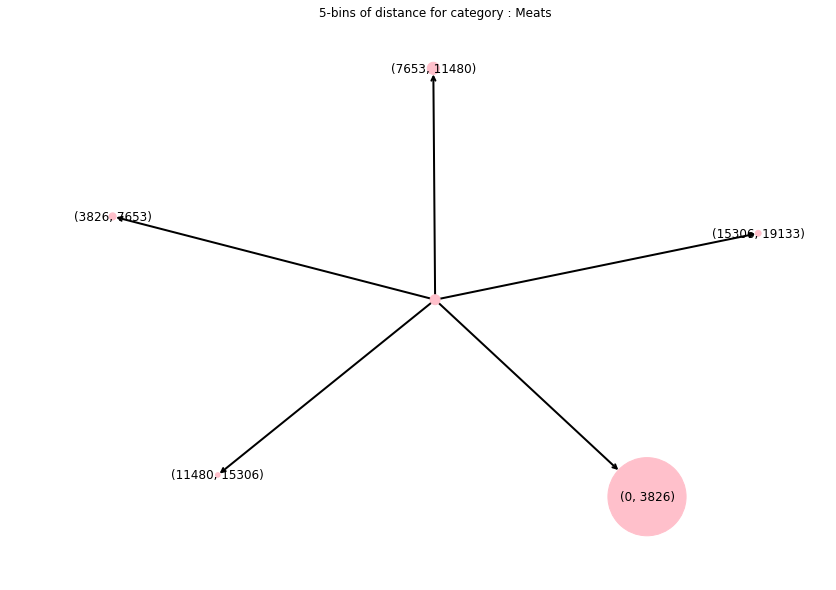

Fermented foods


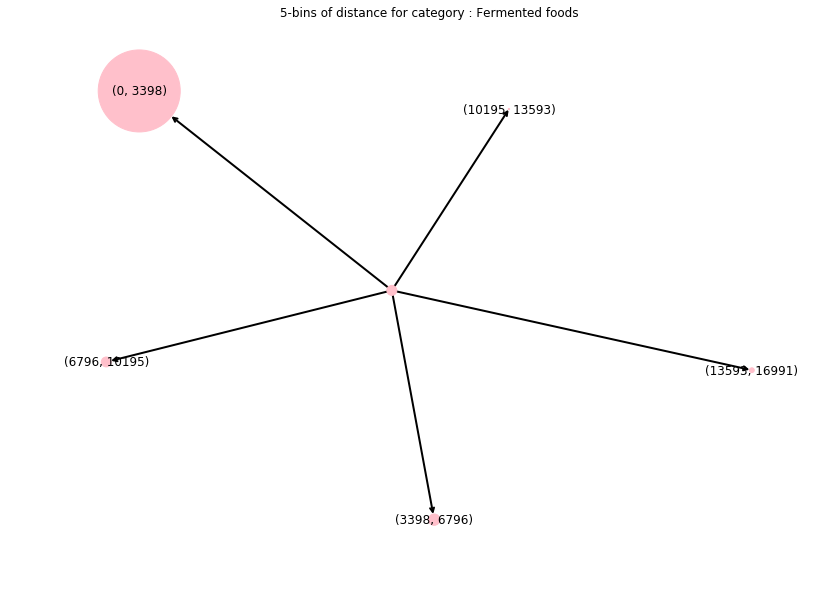

In [16]:
## This is ugly and not informative.. lets not put it in the milestone
for category in largest.index:
    cat = merged[merged[0]==category]
    cat['distance'] = cat['distance'].apply(lambda x : float(x[:-2]))
    print(category)
    count, division = np.histogram((cat['distance']),bins=5)
    ziped = list(zip(division.astype(int),division[1:].astype(int)))



    series = pd.Series(count)
    series.index = ziped
    do_star_graph_series(series,mode='node',title="5-bins of distance for category : "+category,save_under='../img/'+category+'_star.svg')
    plt.show()